In [1]:
import sys
sys.path.append("..")

from configs.templates import *

import os
import matplotlib.pyplot as plt
import random
from dotenv import load_dotenv

load_dotenv()
ws_path = os.getenv("WORKSPACE_PATH")

os.chdir('..')


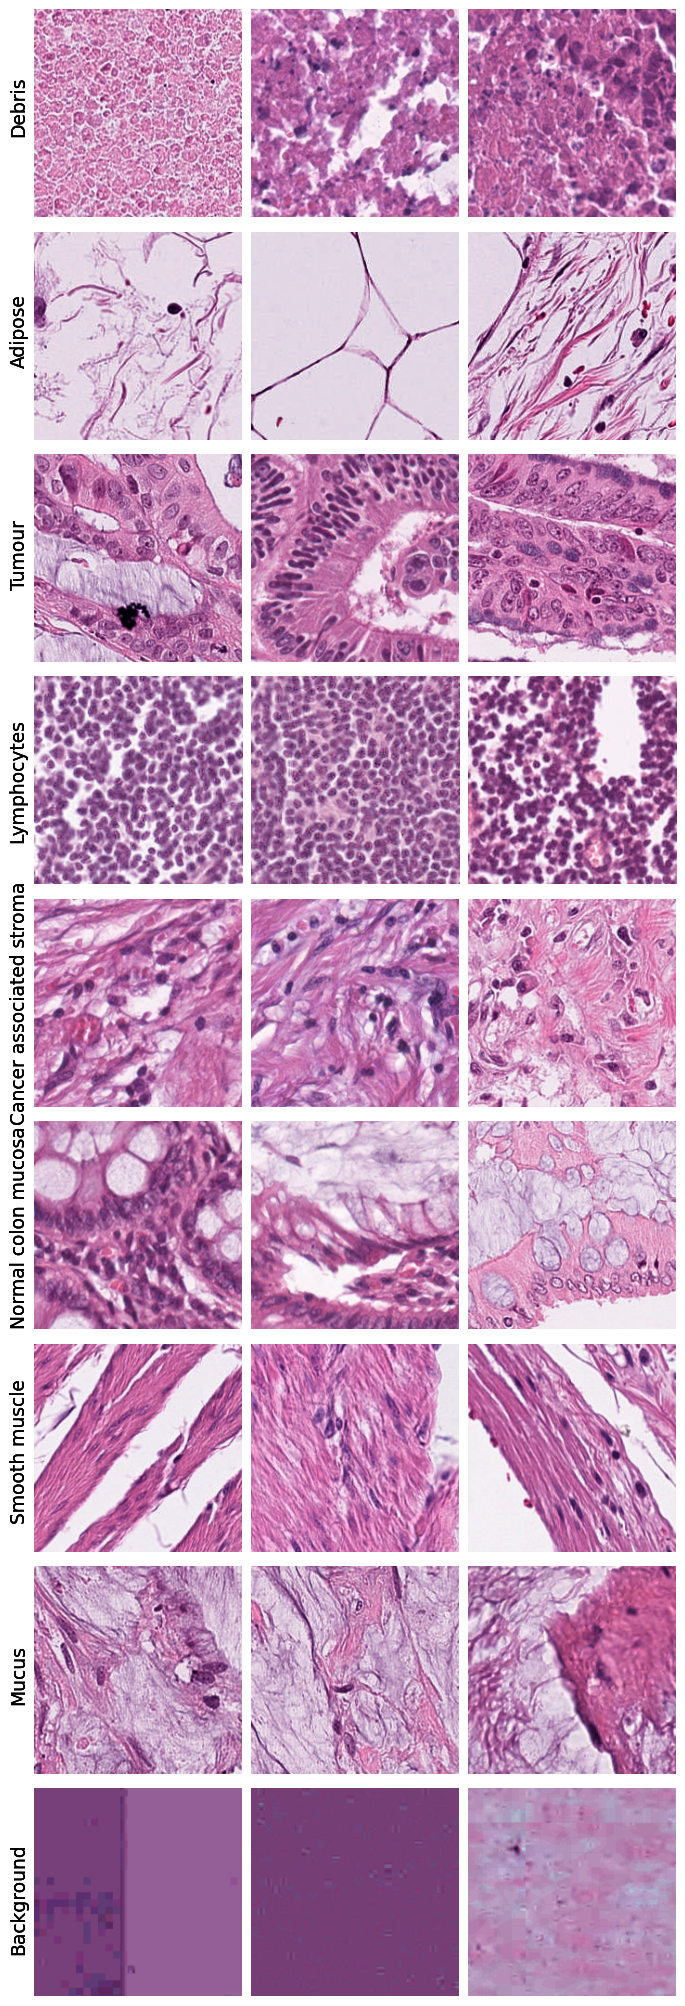

In [7]:
data_dir = f'{ws_path}/data/texture100k/NCT-CRC-HE-100K'
folders = [f for f in os.listdir(data_dir) if not f.startswith('.')]

folder_to_title = {
 'ADI': 'Adipose',
 'BACK': 'Background',
 'STR': 'Cancer associated stroma',
 'DEB': 'Debris',
 'LYM': 'Lymphocytes ',
 'MUC': 'Mucus',
 'NORM': 'Normal colon mucosa',
 'MUS': 'Smooth muscle',
 'TUM': 'Tumour'
}

num_rows=len(folders)
num_cols=3

img_height, img_width = (224, 224)
dpi = 96
fig_width = (img_width * num_cols) / dpi
fig_height = (img_height * num_rows) / dpi

fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), dpi=dpi)
random_images = {}

for i, folder in enumerate(folders):
    path = os.path.join(data_dir, folder)
    images = os.listdir(path)
    random_fnames = random.sample(images, 3)
    random_images[folder] = []
    
    for j, fname in enumerate(random_fnames):
        img = Image.open(os.path.join(path, fname))
        random_images[folder].append(img)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        fig.text(0, 1 - ((i + 0.5) / num_rows), folder_to_title[folder], ha='center', va='center', rotation='vertical', fontsize=14)


plt.tight_layout()
plt.savefig('images/texture100k_examples.png', bbox_inches='tight')
plt.show()

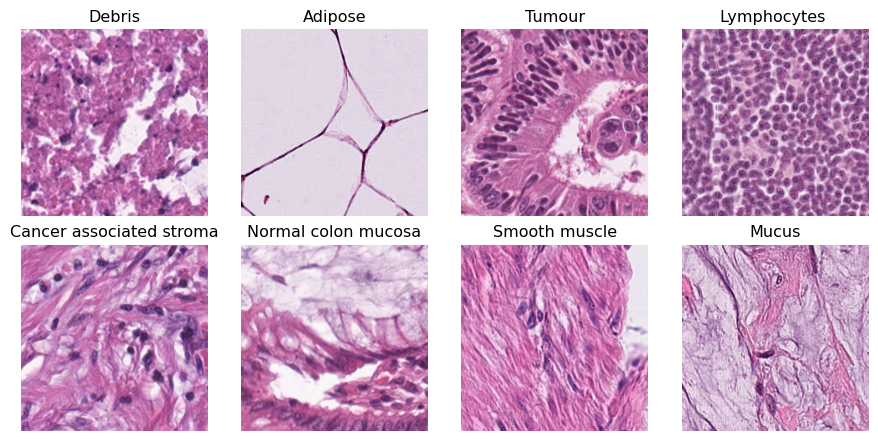

In [10]:
num_rows=2
num_cols=4

img_height, img_width = (224, 224)
dpi = 96 # Display resolution (dots per inch)
fig_width = (img_width * num_cols) / dpi
fig_height = (img_height * num_rows) / dpi
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), dpi=dpi)

for i, folder in enumerate(random_images.keys()):
    if folder == 'BACK':
        continue
        
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(random_images[folder][1])
    axes[row, col].set_title(folder_to_title[folder])
    axes[row, col].axis('off')


plt.tight_layout()
plt.show()